In [9]:
%matplotlib inline
import math
import time
import numpy as np
import matplotlib.pyplot as plt
import random


In [10]:
def normal(data, mu, sigma):
    y_noise = [y_ + random.gauss(mu, sigma) for y_ in data]
    std_y = y_noise - data
    return np.array(y_noise), std_y


def get_data(nodes, mu, var, sub, func):
    x = np.arange(0.0, sub, sub / nodes)
    y = np.array([func(x_) for x_ in x])
    y_noise, sub_y = normal(y, mu, var)
    return x, y, y_noise, sub_y

In [11]:
nodes = 50
mu = 0
var = 0.02


def p_1(x_):
    return np.sin(x_ ** 2 + 1)



In [12]:
def gaussian(x, mu, var):
    # return (1 / (np.sqrt(2 * np.pi * var))) * np.exp(-(((x - mu) ** 2) / (2 * var)))
    return np.exp(-((x - mu) ** 2 / (2 * var)))


def sigmoid(x, mu, var):
    return 1 / (1 + np.exp(-(x - mu) / np.sqrt(var)))


def mle_mine(m, x, Y, var, func, sub_range):
    sub_mu = sub_range / m
    X = np.array([[func(x_, sub_mu * i, var) for i in range(m)] for x_ in x])
    X[:, 0] = 1
    w_ = np.linalg.inv(X.T @ X) @ X.T @ Y
    return w_, X


# it is full bayesian and in predictive part, will use sequential learning
def full_bayesian_mine(m, alpha, x, Y, var, func, sub_range):
    sub_mu = sub_range / m
    X = np.array([[func(x_, sub_mu * i, var) for i in range(m)] for x_ in x])
    X[:, 0] = 1
    # Y = Y.reshape(1, -1)
    ss = np.linalg.inv((X.T @ X / var + alpha * np.identity(m)))
    w_ = ss @ X.T @ Y * (1 / var)
    return w_, X, ss


def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [13]:
m = 10
alpha = 0.5
x, y_origin, y_noise, _ = get_data(nodes, mu, var, 1.0, p_1)

w_, X = mle_mine(m, x, y_noise, var, gaussian, 1.0)
y_ = X @ w_
err = squared_loss(y_, y_noise)
print(err.sum())

0.00791884900749243


In [14]:
def display(m, alpha, beta, x, y_, y_origin, y_noise, line_name, origin_func):
    fig, ax = plt.subplots()
    line1, = ax.plot(x, y_origin, color='red', label=f'{origin_func}')
    line2, = ax.plot(x, y_, color='blue', label=f'{line_name}: m={m}, alpha={alpha},bate={beta}')
    ax.legend()
    # ax.set_title('Linear and Quadratic Functions')
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    plt.scatter(x, y_noise, color='green')
    plt.show()


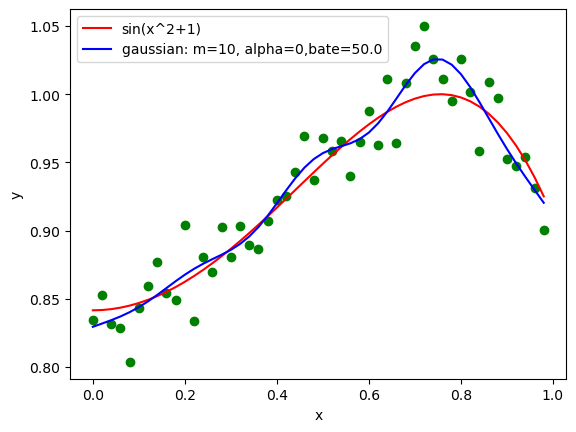

w:  [ 0.79331477  0.11950379 -0.31872525  0.74156863 -1.13250426  1.55578027
 -1.49268072  1.27068307 -0.58792504  0.28789059]


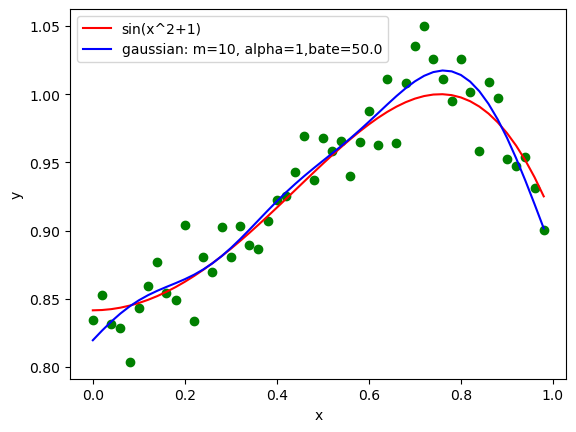

w:  [ 0.75476438  0.07999402 -0.00314582  0.01972508  0.07772335  0.05324343
  0.03267843  0.10908357  0.06081669  0.1212681 ]


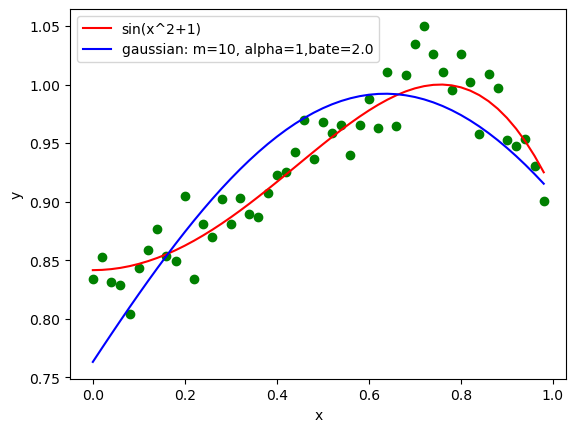

w:  [0.23203699 0.04024043 0.04162475 0.04821464 0.06024879 0.07732823
 0.09842809 0.12199904 0.14614436 0.16884571]


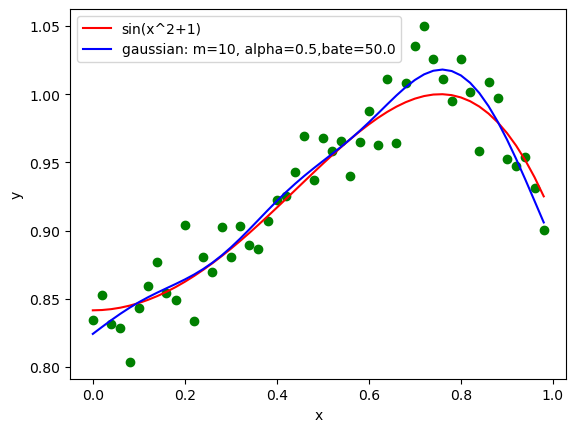

w:  [ 0.78414424  0.03968284  0.02355067 -0.00873962  0.06889649  0.06437395
 -0.00361968  0.11902494  0.05788163  0.09288256]


In [15]:
params = [(0.02, 0), (0.02, 1), (0.5, 1), (0.02, 0.5)]

for var_el, al in params:
    w_, X, _ = full_bayesian_mine(m, al, x, y_noise, var_el, gaussian, 1.0)
    y_ = X @ w_
    display(m, al, 1 / var_el, x, y_, y_origin, y_noise, 'gaussian', 'sin(x^2+1)')
    print("w: ", w_)



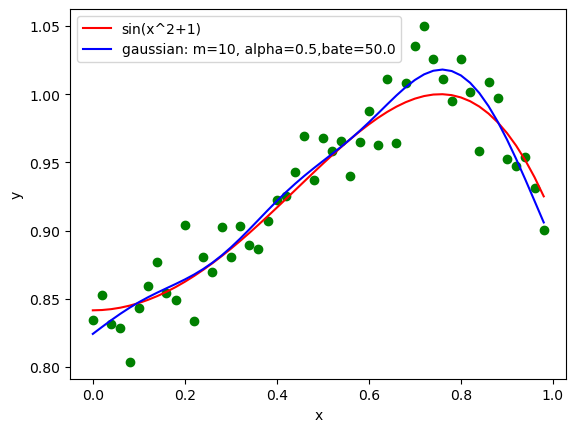

w:  [ 0.78414424  0.03968284  0.02355067 -0.00873962  0.06889649  0.06437395
 -0.00361968  0.11902494  0.05788163  0.09288256]


In [16]:
param = [(0.02, 0.5)]
for var_el, al in param:
    w_, X, _ = full_bayesian_mine(m, al, x, y_noise, var_el, gaussian, 1.0)
    y_ = X @ w_
    display(m, al, 1 / var_el, x, y_, y_origin, y_noise, 'gaussian', 'sin(x^2+1)')
    print("w: ", w_)

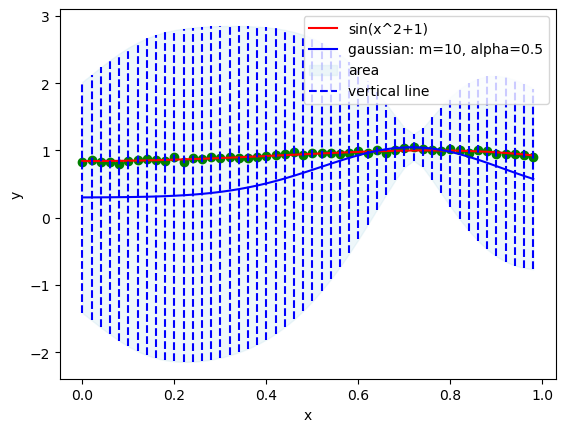

[36]
1


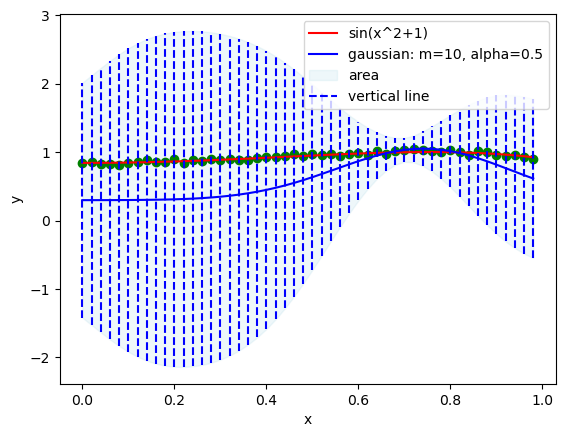

[36, 34]
2


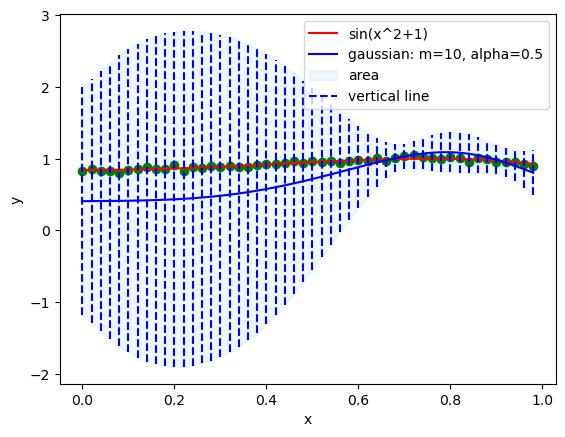

[36, 34, 46]
3


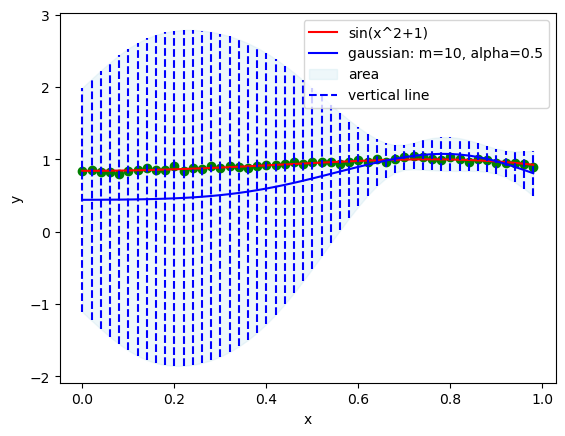

[36, 34, 46, 44]
4


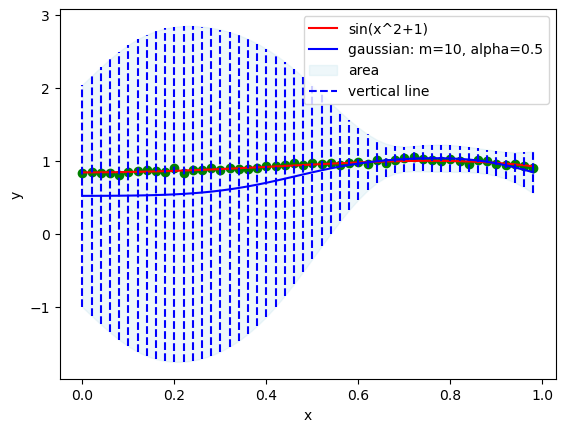

[36, 34, 46, 44, 41]
5


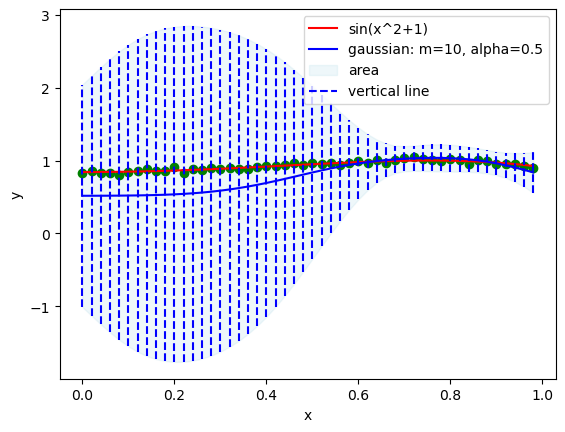

[36, 34, 46, 44, 41, 45]
6


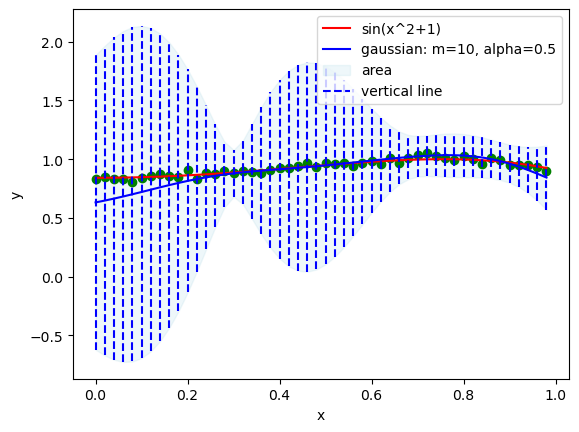

[36, 34, 46, 44, 41, 45, 15]
7


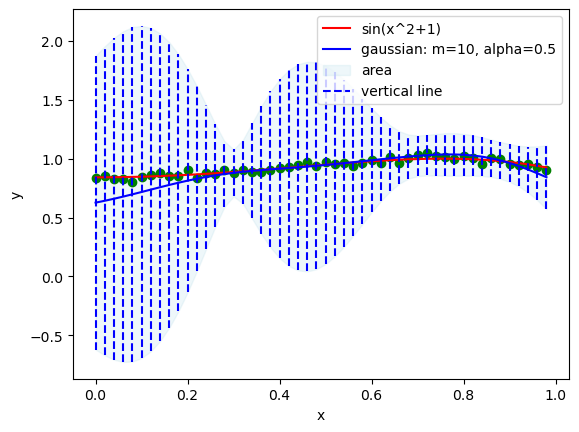

[36, 34, 46, 44, 41, 45, 15, 43]
8


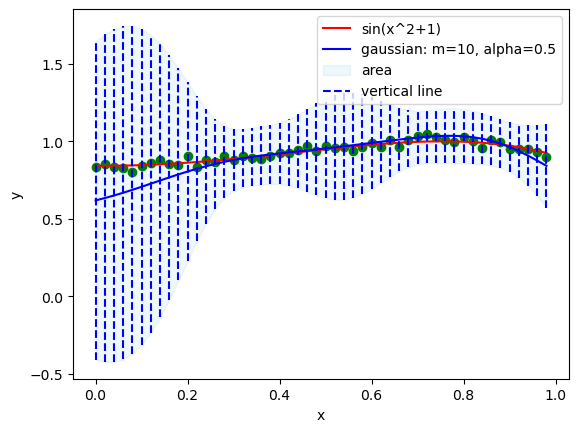

[36, 34, 46, 44, 41, 45, 15, 43, 20]
9


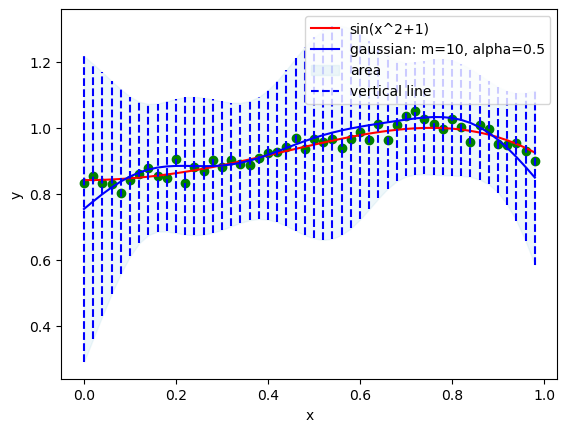

[36, 34, 46, 44, 41, 45, 15, 43, 20, 7]
10


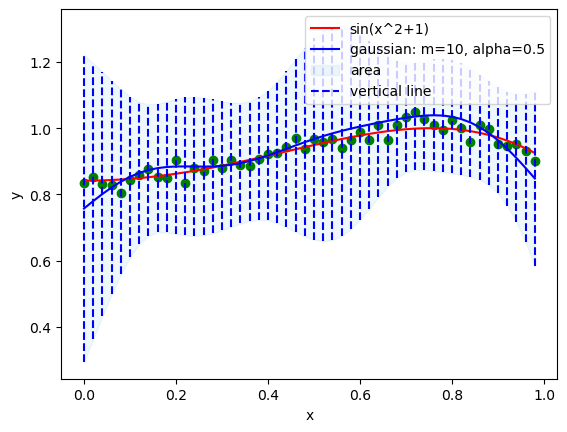

[36, 34, 46, 44, 41, 45, 15, 43, 20, 7, 36]
11


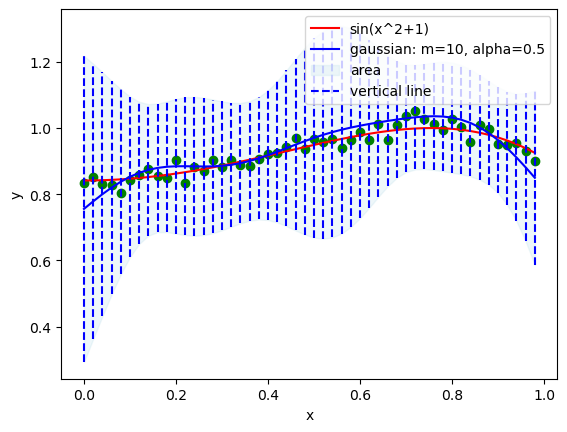

[36, 34, 46, 44, 41, 45, 15, 43, 20, 7, 36, 37]
12


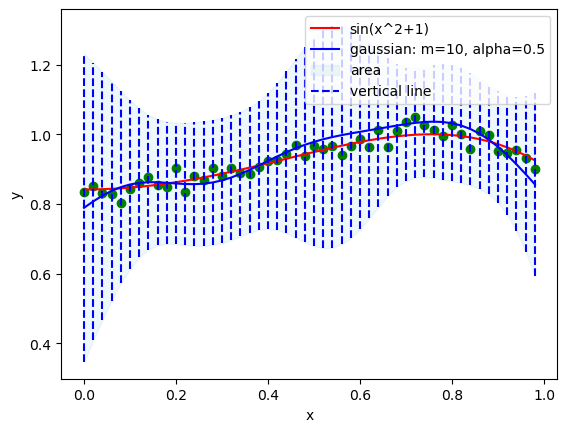

[36, 34, 46, 44, 41, 45, 15, 43, 20, 7, 36, 37, 11]
13


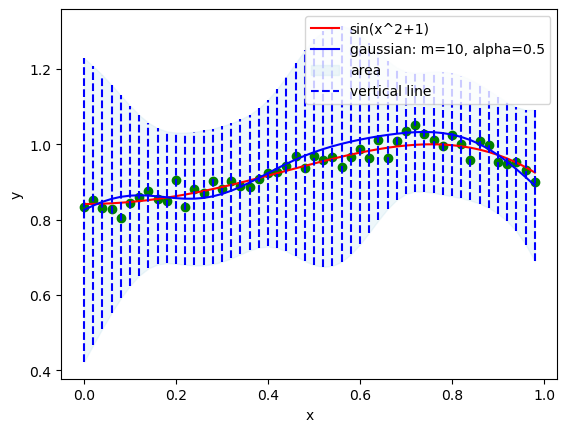

[36, 34, 46, 44, 41, 45, 15, 43, 20, 7, 36, 37, 11, 48]
14


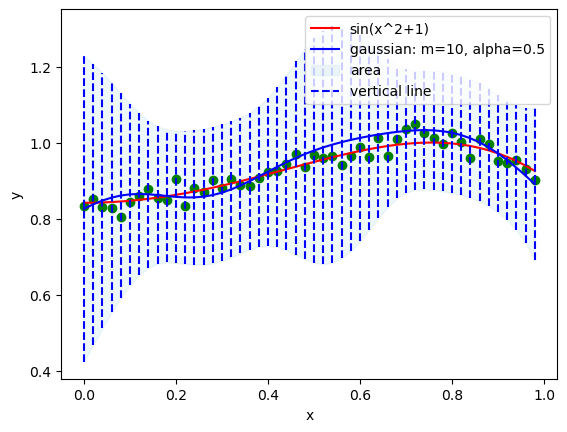

[36, 34, 46, 44, 41, 45, 15, 43, 20, 7, 36, 37, 11, 48, 40]
15


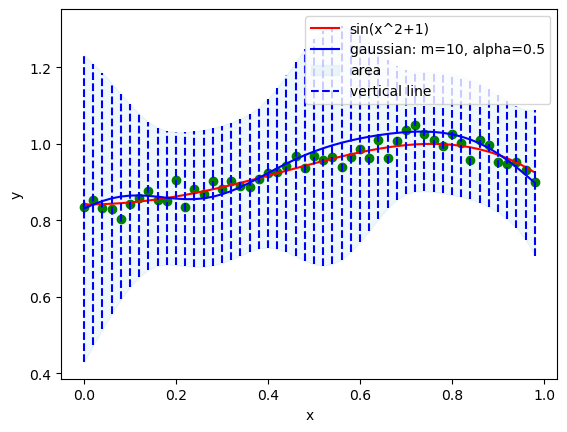

[36, 34, 46, 44, 41, 45, 15, 43, 20, 7, 36, 37, 11, 48, 40, 47]
16


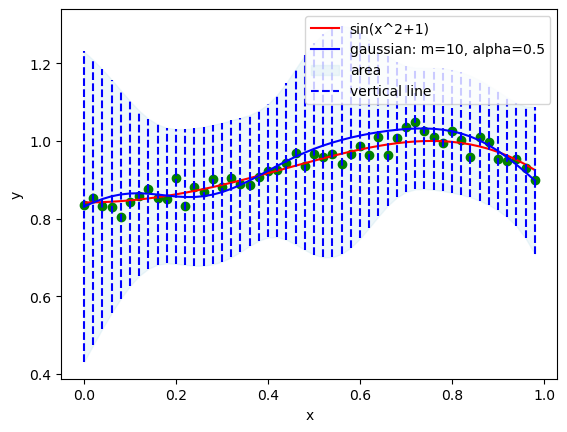

[36, 34, 46, 44, 41, 45, 15, 43, 20, 7, 36, 37, 11, 48, 40, 47, 20]
17


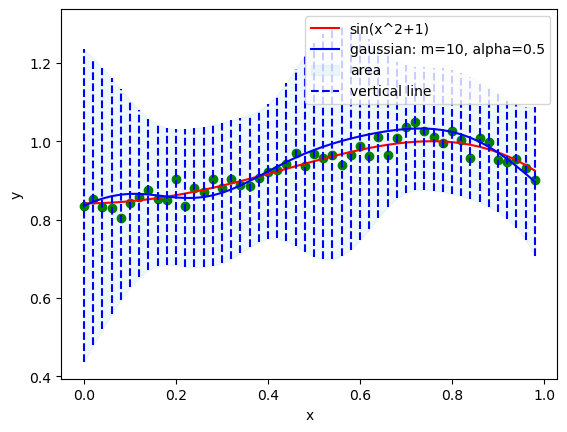

[36, 34, 46, 44, 41, 45, 15, 43, 20, 7, 36, 37, 11, 48, 40, 47, 20, 45]
18


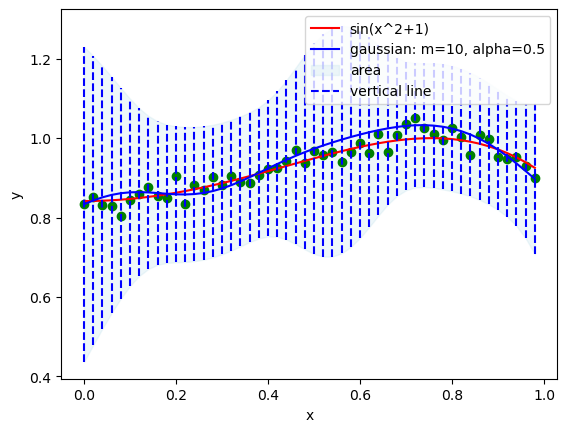

[36, 34, 46, 44, 41, 45, 15, 43, 20, 7, 36, 37, 11, 48, 40, 47, 20, 45, 15]
19


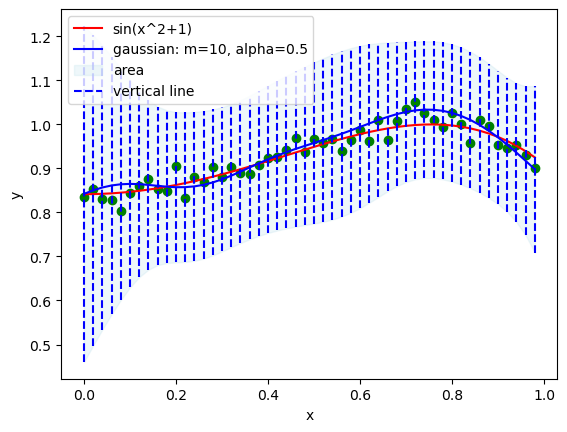

[36, 34, 46, 44, 41, 45, 15, 43, 20, 7, 36, 37, 11, 48, 40, 47, 20, 45, 15, 27]
20


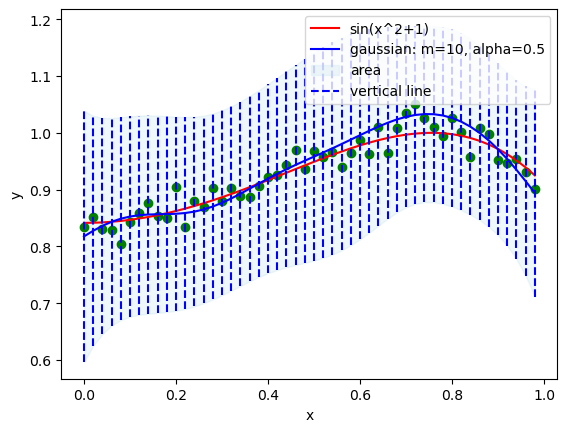

[36, 34, 46, 44, 41, 45, 15, 43, 20, 7, 36, 37, 11, 48, 40, 47, 20, 45, 15, 27, 2]
21


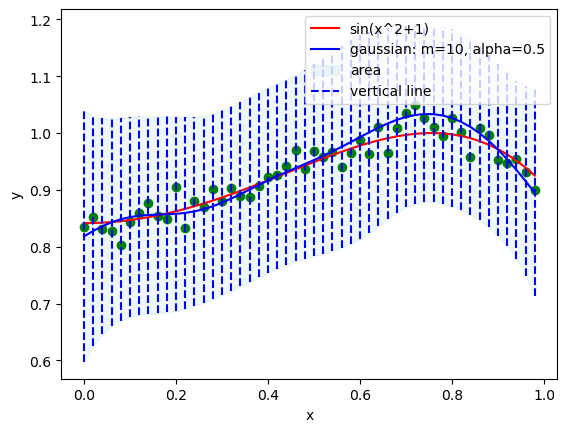

[36, 34, 46, 44, 41, 45, 15, 43, 20, 7, 36, 37, 11, 48, 40, 47, 20, 45, 15, 27, 2, 24]
22


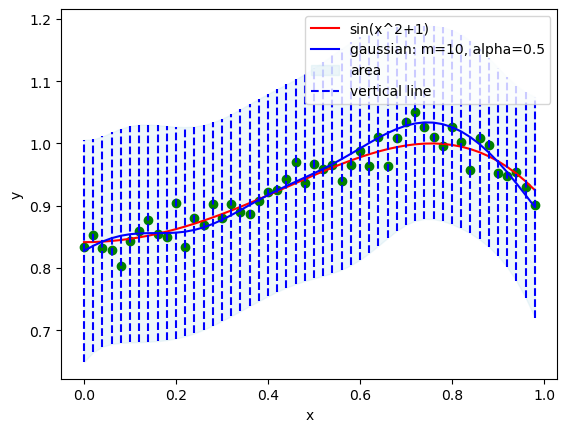

[36, 34, 46, 44, 41, 45, 15, 43, 20, 7, 36, 37, 11, 48, 40, 47, 20, 45, 15, 27, 2, 24, 0]
23


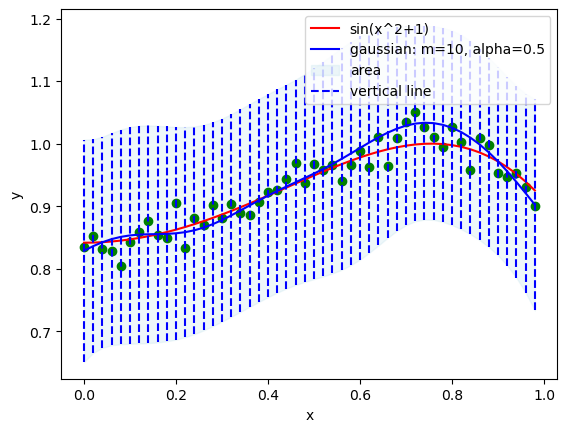

[36, 34, 46, 44, 41, 45, 15, 43, 20, 7, 36, 37, 11, 48, 40, 47, 20, 45, 15, 27, 2, 24, 0, 48]
24


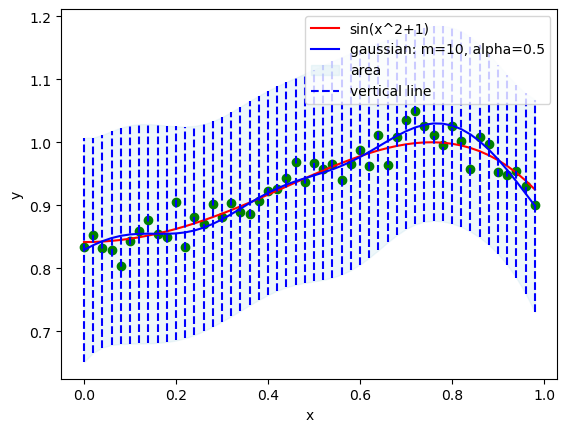

[36, 34, 46, 44, 41, 45, 15, 43, 20, 7, 36, 37, 11, 48, 40, 47, 20, 45, 15, 27, 2, 24, 0, 48, 33]
25


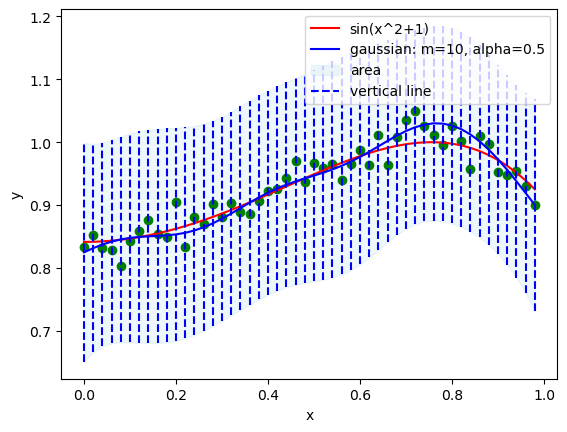

[36, 34, 46, 44, 41, 45, 15, 43, 20, 7, 36, 37, 11, 48, 40, 47, 20, 45, 15, 27, 2, 24, 0, 48, 33, 3]
26


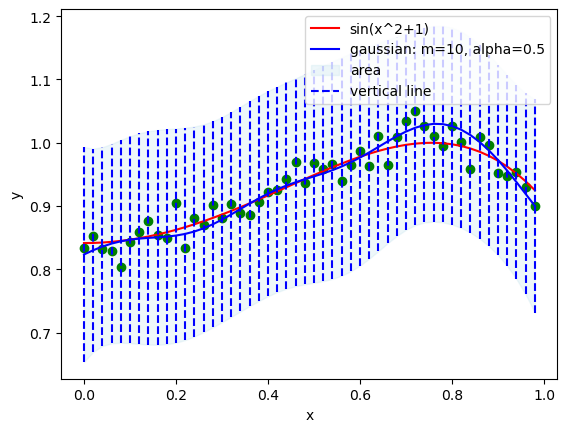

[36, 34, 46, 44, 41, 45, 15, 43, 20, 7, 36, 37, 11, 48, 40, 47, 20, 45, 15, 27, 2, 24, 0, 48, 33, 3, 2]
27


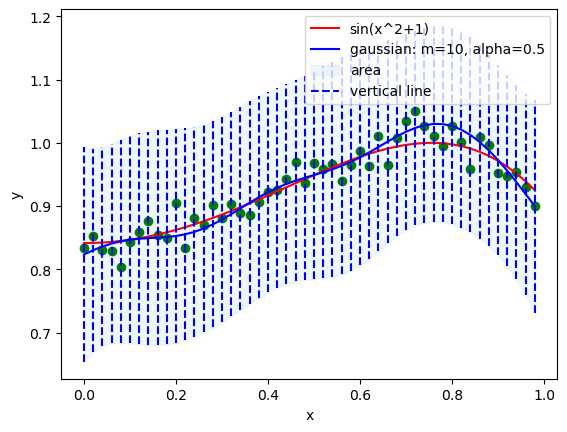

[36, 34, 46, 44, 41, 45, 15, 43, 20, 7, 36, 37, 11, 48, 40, 47, 20, 45, 15, 27, 2, 24, 0, 48, 33, 3, 2, 22]
28


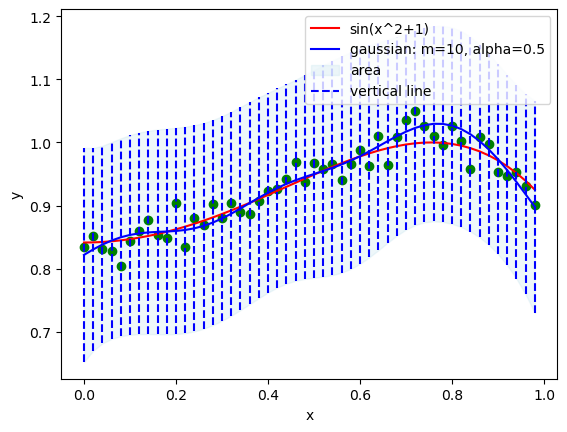

[36, 34, 46, 44, 41, 45, 15, 43, 20, 7, 36, 37, 11, 48, 40, 47, 20, 45, 15, 27, 2, 24, 0, 48, 33, 3, 2, 22, 7]
29


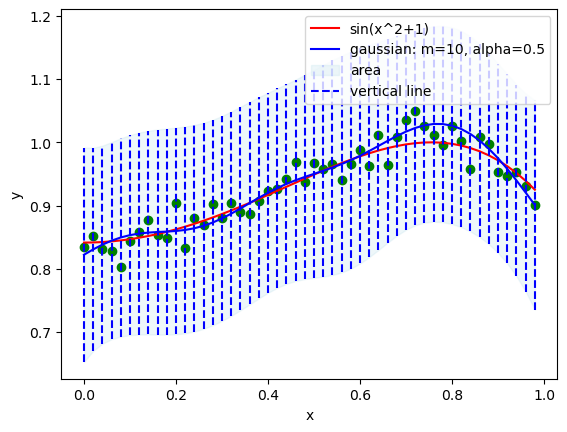

[36, 34, 46, 44, 41, 45, 15, 43, 20, 7, 36, 37, 11, 48, 40, 47, 20, 45, 15, 27, 2, 24, 0, 48, 33, 3, 2, 22, 7, 47]
30


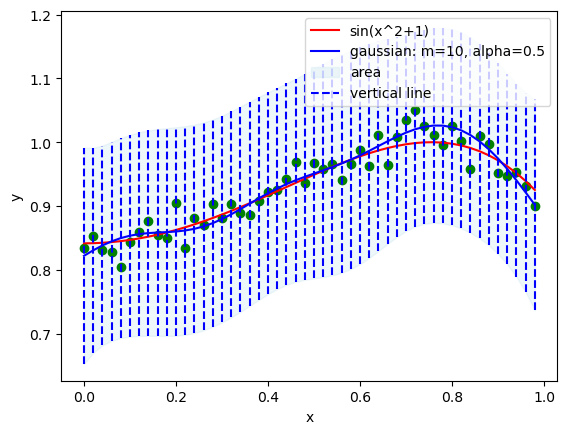

[36, 34, 46, 44, 41, 45, 15, 43, 20, 7, 36, 37, 11, 48, 40, 47, 20, 45, 15, 27, 2, 24, 0, 48, 33, 3, 2, 22, 7, 47, 38]
31


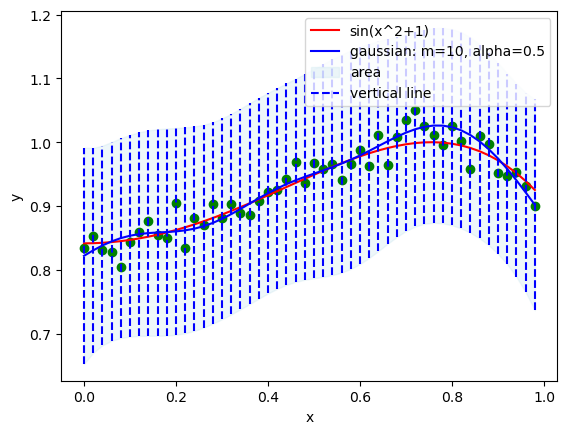

[36, 34, 46, 44, 41, 45, 15, 43, 20, 7, 36, 37, 11, 48, 40, 47, 20, 45, 15, 27, 2, 24, 0, 48, 33, 3, 2, 22, 7, 47, 38, 15]
32


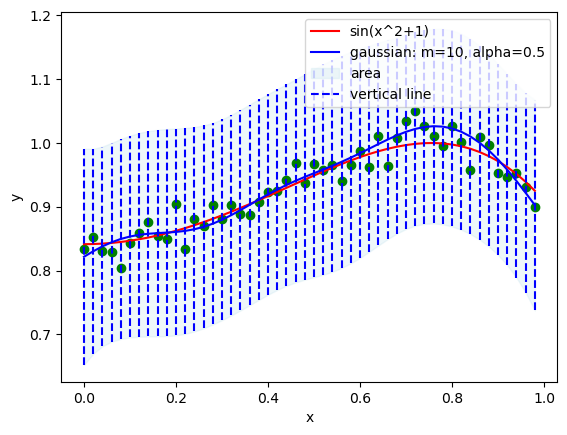

[36, 34, 46, 44, 41, 45, 15, 43, 20, 7, 36, 37, 11, 48, 40, 47, 20, 45, 15, 27, 2, 24, 0, 48, 33, 3, 2, 22, 7, 47, 38, 15, 32]
33


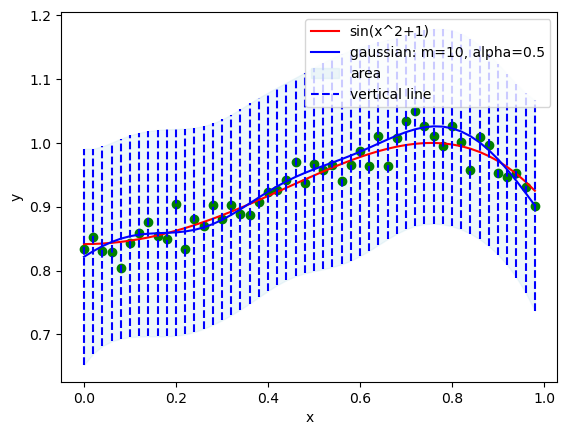

[36, 34, 46, 44, 41, 45, 15, 43, 20, 7, 36, 37, 11, 48, 40, 47, 20, 45, 15, 27, 2, 24, 0, 48, 33, 3, 2, 22, 7, 47, 38, 15, 32, 23]
34


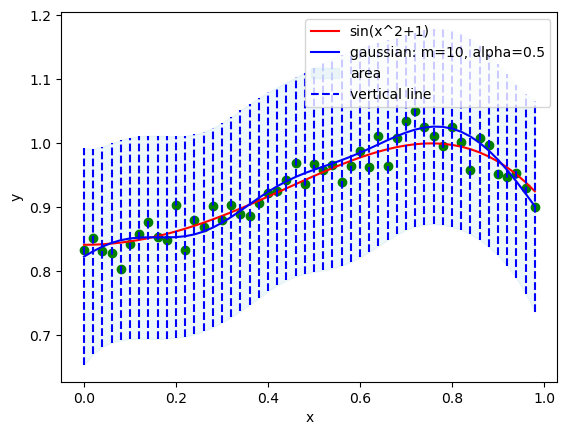

[36, 34, 46, 44, 41, 45, 15, 43, 20, 7, 36, 37, 11, 48, 40, 47, 20, 45, 15, 27, 2, 24, 0, 48, 33, 3, 2, 22, 7, 47, 38, 15, 32, 23, 11]
35


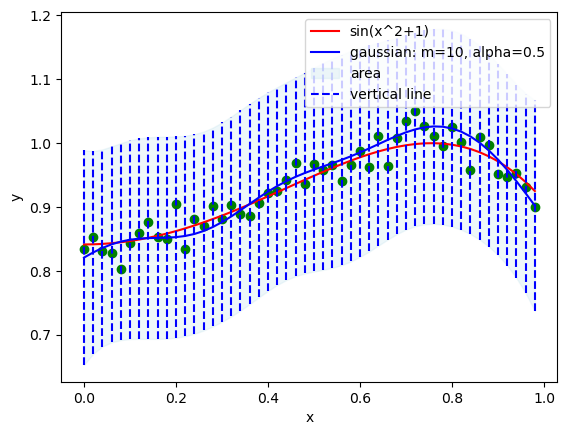

[36, 34, 46, 44, 41, 45, 15, 43, 20, 7, 36, 37, 11, 48, 40, 47, 20, 45, 15, 27, 2, 24, 0, 48, 33, 3, 2, 22, 7, 47, 38, 15, 32, 23, 11, 3]
36


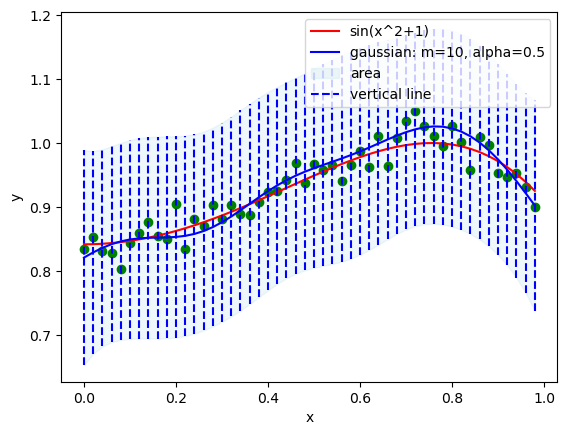

[36, 34, 46, 44, 41, 45, 15, 43, 20, 7, 36, 37, 11, 48, 40, 47, 20, 45, 15, 27, 2, 24, 0, 48, 33, 3, 2, 22, 7, 47, 38, 15, 32, 23, 11, 3, 25]
37


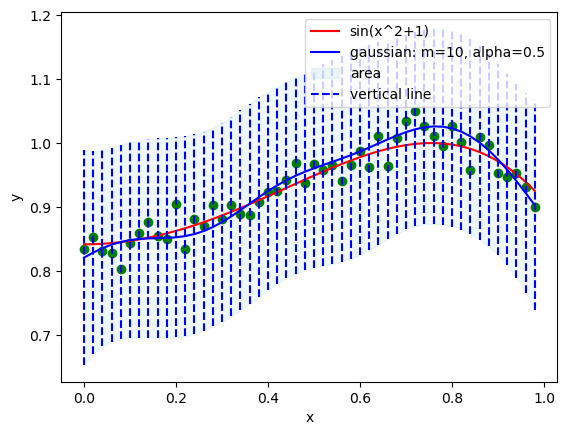

[36, 34, 46, 44, 41, 45, 15, 43, 20, 7, 36, 37, 11, 48, 40, 47, 20, 45, 15, 27, 2, 24, 0, 48, 33, 3, 2, 22, 7, 47, 38, 15, 32, 23, 11, 3, 25, 5]
38


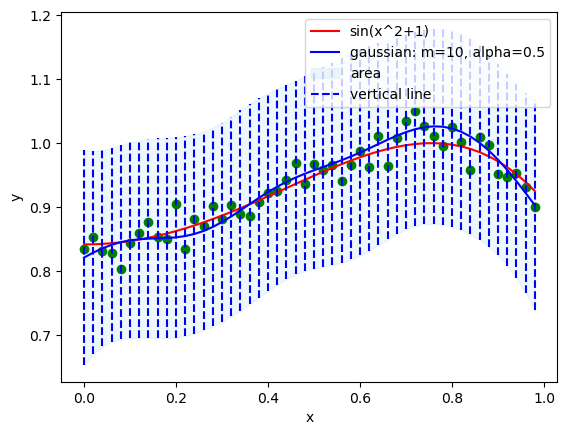

[36, 34, 46, 44, 41, 45, 15, 43, 20, 7, 36, 37, 11, 48, 40, 47, 20, 45, 15, 27, 2, 24, 0, 48, 33, 3, 2, 22, 7, 47, 38, 15, 32, 23, 11, 3, 25, 5, 24]
39


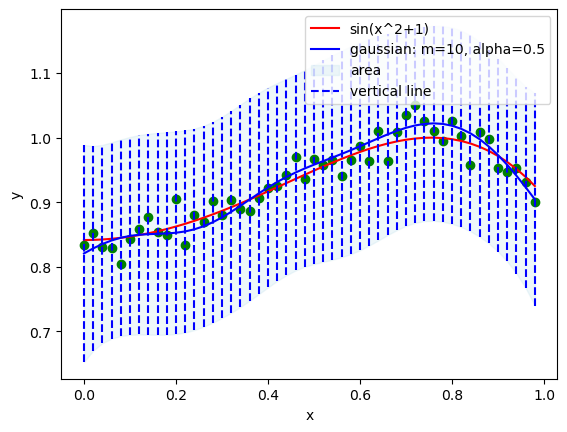

[36, 34, 46, 44, 41, 45, 15, 43, 20, 7, 36, 37, 11, 48, 40, 47, 20, 45, 15, 27, 2, 24, 0, 48, 33, 3, 2, 22, 7, 47, 38, 15, 32, 23, 11, 3, 25, 5, 24, 39]
40


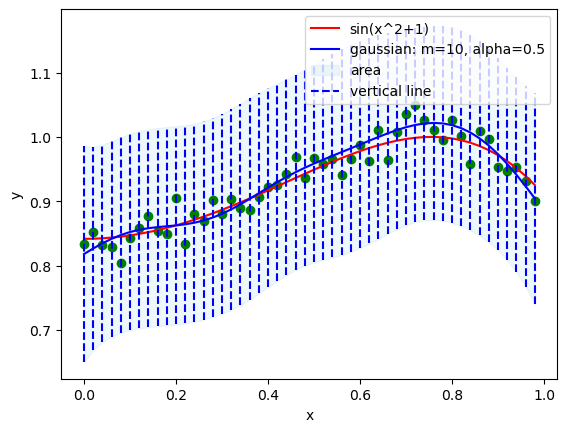

[36, 34, 46, 44, 41, 45, 15, 43, 20, 7, 36, 37, 11, 48, 40, 47, 20, 45, 15, 27, 2, 24, 0, 48, 33, 3, 2, 22, 7, 47, 38, 15, 32, 23, 11, 3, 25, 5, 24, 39, 10]
41


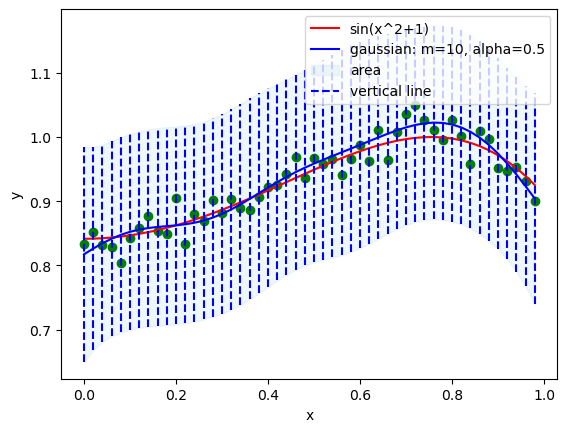

[36, 34, 46, 44, 41, 45, 15, 43, 20, 7, 36, 37, 11, 48, 40, 47, 20, 45, 15, 27, 2, 24, 0, 48, 33, 3, 2, 22, 7, 47, 38, 15, 32, 23, 11, 3, 25, 5, 24, 39, 10, 43]
42


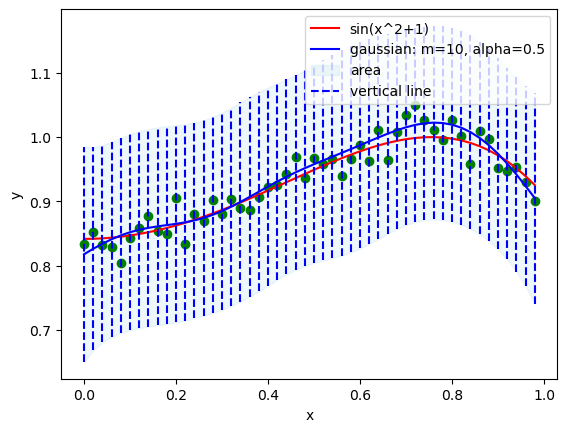

[36, 34, 46, 44, 41, 45, 15, 43, 20, 7, 36, 37, 11, 48, 40, 47, 20, 45, 15, 27, 2, 24, 0, 48, 33, 3, 2, 22, 7, 47, 38, 15, 32, 23, 11, 3, 25, 5, 24, 39, 10, 43, 14]
43


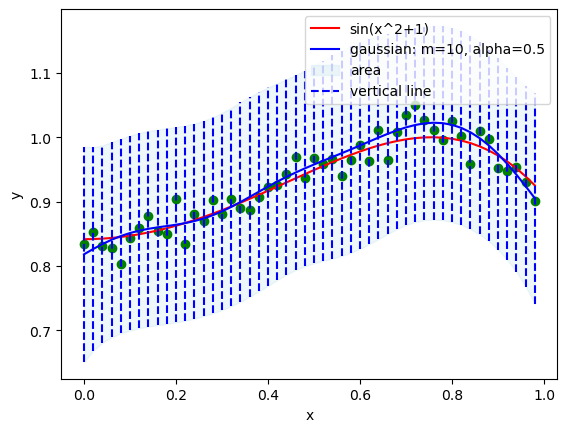

[36, 34, 46, 44, 41, 45, 15, 43, 20, 7, 36, 37, 11, 48, 40, 47, 20, 45, 15, 27, 2, 24, 0, 48, 33, 3, 2, 22, 7, 47, 38, 15, 32, 23, 11, 3, 25, 5, 24, 39, 10, 43, 14, 8]
44


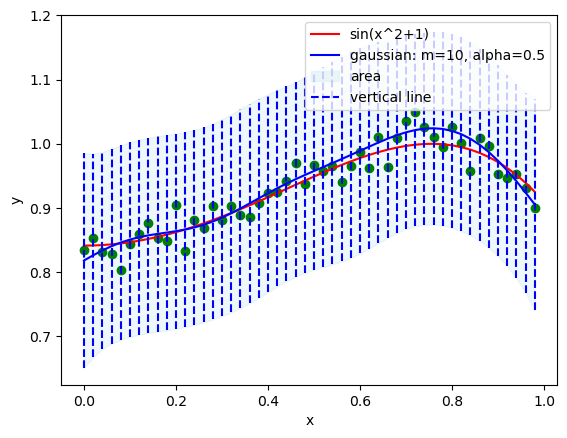

[36, 34, 46, 44, 41, 45, 15, 43, 20, 7, 36, 37, 11, 48, 40, 47, 20, 45, 15, 27, 2, 24, 0, 48, 33, 3, 2, 22, 7, 47, 38, 15, 32, 23, 11, 3, 25, 5, 24, 39, 10, 43, 14, 8, 35]
45


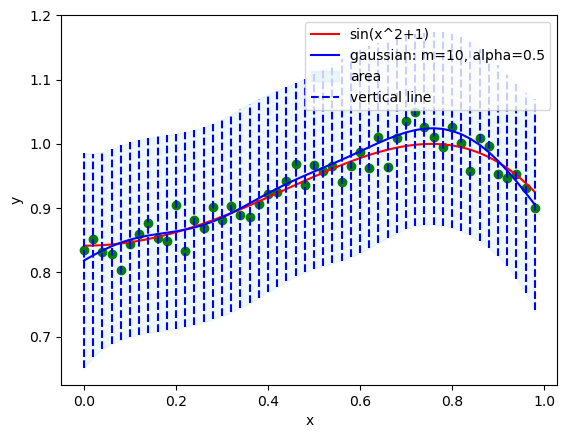

[36, 34, 46, 44, 41, 45, 15, 43, 20, 7, 36, 37, 11, 48, 40, 47, 20, 45, 15, 27, 2, 24, 0, 48, 33, 3, 2, 22, 7, 47, 38, 15, 32, 23, 11, 3, 25, 5, 24, 39, 10, 43, 14, 8, 35, 26]
46


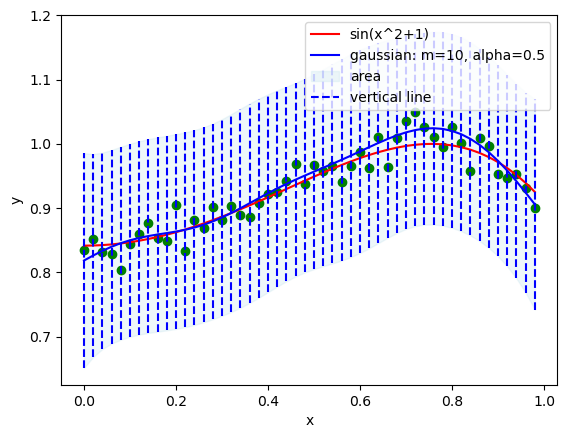

[36, 34, 46, 44, 41, 45, 15, 43, 20, 7, 36, 37, 11, 48, 40, 47, 20, 45, 15, 27, 2, 24, 0, 48, 33, 3, 2, 22, 7, 47, 38, 15, 32, 23, 11, 3, 25, 5, 24, 39, 10, 43, 14, 8, 35, 26, 5]
47


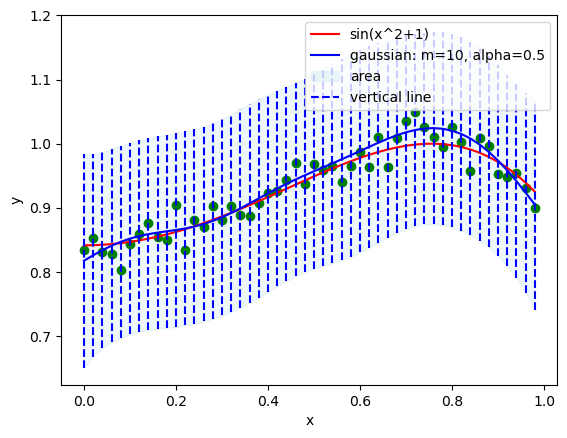

[36, 34, 46, 44, 41, 45, 15, 43, 20, 7, 36, 37, 11, 48, 40, 47, 20, 45, 15, 27, 2, 24, 0, 48, 33, 3, 2, 22, 7, 47, 38, 15, 32, 23, 11, 3, 25, 5, 24, 39, 10, 43, 14, 8, 35, 26, 5, 7]
48


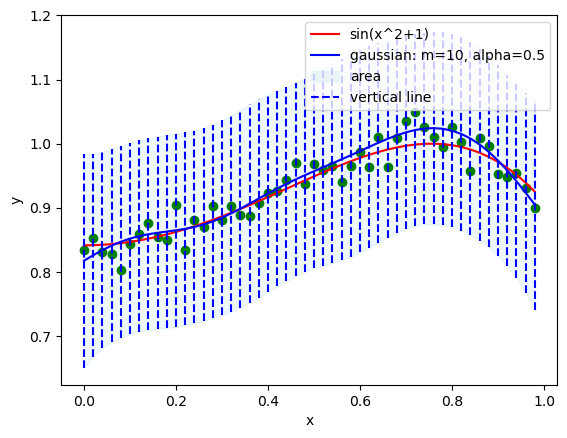

[36, 34, 46, 44, 41, 45, 15, 43, 20, 7, 36, 37, 11, 48, 40, 47, 20, 45, 15, 27, 2, 24, 0, 48, 33, 3, 2, 22, 7, 47, 38, 15, 32, 23, 11, 3, 25, 5, 24, 39, 10, 43, 14, 8, 35, 26, 5, 7, 13]
49


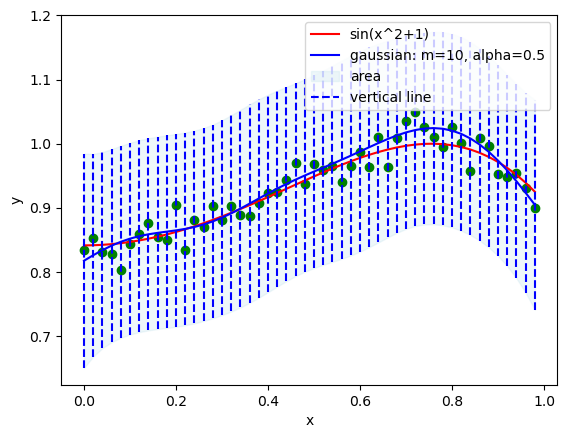

[36, 34, 46, 44, 41, 45, 15, 43, 20, 7, 36, 37, 11, 48, 40, 47, 20, 45, 15, 27, 2, 24, 0, 48, 33, 3, 2, 22, 7, 47, 38, 15, 32, 23, 11, 3, 25, 5, 24, 39, 10, 43, 14, 8, 35, 26, 5, 7, 13, 27]
50


In [17]:
def display_distribution(m, alpha, x, y_, y_origin, y_noise, area, line_name, origin_func):
    fig, ax = plt.subplots()
    line1, = ax.plot(x, y_origin, color='red', label=f'{origin_func}')
    line2, = ax.plot(x, y_, color='blue', label=f'{line_name}: m={m}, alpha={alpha}')

    # 固定置信区间的上下界
    lower_bound = -1
    upper_bound = 5

    # 使用plt.fill_between填充置信区间
    plt.fill_between(x, y_ + area, y_ - area, alpha=0.2, color='lightblue', label='area')
    plt.vlines(x, ymin=y_ - area, ymax=y_ + area, color='blue', linestyle='--', label='vertical line')

    # 在区间内添加竖线
    # plt.axvline(x.all(), color='blue', linestyle='--', label='竖线')
    ax.legend()
    # ax.set_title('Linear and Quadratic Functions')
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    plt.scatter(x, y_noise, color='green')
    plt.show()


# i_arr = []
# 
# # x, y_origin, y_noise, sub_y = get_data(nodes, mu, var, 1.0, p_1)
# _, X, _ = full_bayesian_mine(m, alpha, x, y_noise, var, gaussian, 1.0)
# 
# for i in range(0, 50):
#     index = random.randint(0, 49)
#     i_arr.append(index)
#     # x_arr.append(x[index])
#     # y_noise_arr.append(y_noise[index])
#     w_, _, ss = full_bayesian_mine(m, alpha, x[i_arr], y_noise[i_arr], var, gaussian, 1.0)
#     y_ = X @ w_
#     var_x = []
#     for el in X:
#         var_x.append(var + el.T @ ss @ el)
# 
#     display_distribution(m, alpha, x, y_, y_origin, y_noise, np.sqrt(var_x), 'gaussian', 'sin(x^2+1)')
#     print(i_arr)
#     print(i + 1)

i_arr = []

# sequential learning,
_, X, _ = full_bayesian_mine(m, alpha, x, y_noise, var, gaussian, 1.0)
mn = np.zeros(m).reshape(-1, 1)
sn_1 = alpha * np.identity(m)
sn = np.linalg.inv(sn_1)
for i in range(0, 50):
    index = random.randint(0, 49)
    i_arr.append(index)
    # sequential learning
    sn_1_pre = sn_1
    sn_1 = sn_1_pre + (1 / var) * (X[index].reshape(-1, 1)) @ (X[index].reshape(1, -1))
    sn = np.linalg.inv(sn_1)
    mn = sn @ (sn_1_pre @ mn + (1 / var) * (X[index].reshape(-1, 1)) @ (y_noise[index].reshape(1, 1)))
    y_ = X @ mn
    var_x = []
    for el in X:
        var_x.append(var + el.T @ sn @ el)

    display_distribution(m, alpha, x, y_.reshape(-1), y_origin, y_noise, np.sqrt(var_x), 'gaussian', 'sin(x^2+1)')
    print(i_arr)
    print(i + 1)
